Saving dataset_credito_simulado.xlsx to dataset_credito_simulado.xlsx


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. 

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.00      0.00      0.00         0

    accuracy                           0.90        10
   macro avg       0.50      0.45      0.47        10
weighted avg       1.00      0.90      0.95        10

Matriz de Confusão:
 [[9 1]
 [0 0]]
AUC: nan


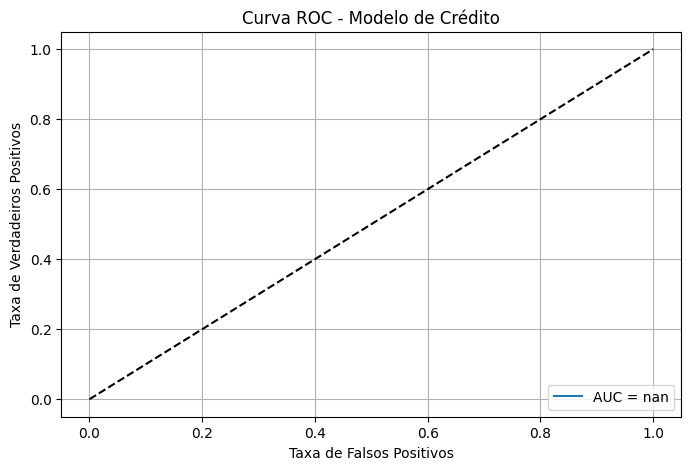

In [1]:
#Instalação e importação das bibliotecas
!pip install pandas scikit-learn matplotlib seaborn openpyxl

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

#Carregamento do Dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_excel("dataset_credito_simulado.xlsx")  # substitua com o nome correto
df.head()

#Pré-processamento básico
# Transformar variáveis categóricas em dummies
df_dummies = pd.get_dummies(df, drop_first=True)

# Separar variáveis preditoras e variável alvo
X = df_dummies.drop("status", axis=1)
y = df_dummies["status"]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Treinar o modelo
# Instanciar e treinar modelo
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# Previsões
y_pred = modelo.predict(X_test)
y_proba = modelo.predict_proba(X_test)[:, 1]

#Avaliação do Modelo

# Métricas
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))

# AUC
auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc:.2f}")

#Curva ROC

fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curva ROC - Modelo de Crédito")
plt.legend(loc="lower right")
plt.grid()
plt.show()

